# Selección y regularización de modelos lineales

A pesar de su simplicidad, los modelos lineales tienen ventajas de interpretabilidad y con frecuencia muestran buen rendimiento en predicción

$$
Y = \beta_0+\beta_1X_1+\cdots+\beta_pX_p+\epsilon.
$$


Esta sección aborda el cambiar el ajuste de mínimos cuadrados ordinarios (OLS) tradicional por métodos alternativos que se apalancan en OLS.

**¿Por que usar alternativas a OLS?**

- Predictibilidad: Si la relación entre las variables es aproximadamente lineal y si $n\gg p$ (el número de observaciones es más grande que el número de variables), entonces OLS tiene poco sesgo y rinde bien en datos *test*. Sin embargo, si $n$ no es tan grande respecto a $p$, puede haber mucha variabilidad en OLS, lo que resulta en sobreajuste y mal rendimiento en *test*.

Algunos de los problemas que surgen cuando $n\approx p$:

1. **Sobreajuste (Overfitting)**

El **error cuadrático medio** (MSE) en el conjunto de entrenamiento se define como:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

donde:
- $ y_i $ es el valor observado,
- $ \hat{y}_i $ es la predicción del modelo,
- $ n $ es el número de observaciones.

Cuando el número de variables $p$ se aproxima a $n$, el modelo puede ajustarse casi perfectamente, lo que minimiza el MSE en el conjunto de entrenamiento, pero aumenta el error en nuevos datos (error de generalización). Este es el problema del sobreajuste.

2. **Multicolinealidad**

El **problema de multicolinealidad** se detecta cuando las variables explicativas están altamente correlacionadas entre sí. Un indicador común es el **Factor de Inflación de la Varianza (VIF)** para cada variable $j$, que se define como:

$$
VIF_j = \frac{1}{1 - R_j^2}
$$

donde $ R_j^2 $ es el coeficiente de determinación de la regresión de la variable $ X_j $ sobre todas las demás variables.

Cuando $ VIF_j $ es grande (mayor a 10, por ejemplo), indica una alta colinealidad. Esto causa inestabilidad en las estimaciones de los coeficientes $ \hat{\beta}_j $, lo que puede hacer que el modelo sea sensible a pequeños cambios en los datos.

3. **Modelo No Identificable**

En regresión lineal, los coeficientes de los parámetros $ \boldsymbol{\beta} = (\beta_1, \beta_2, \dots, \beta_p) $ se obtienen resolviendo el sistema de ecuaciones lineales:

$$
\boldsymbol{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

donde:
- $ \boldsymbol{y} $ es el vector de observaciones (de dimensión $ n \times 1 $),
- $ \mathbf{X} $ es la matriz de diseño (de dimensión $ n \times p $),
- $ \boldsymbol{\beta} $ es el vector de coeficientes,
- $ \boldsymbol{\epsilon} $ es el término de error.

Para resolver $ \boldsymbol{\beta} $, necesitamos invertir la matriz $ \mathbf{X}^T \mathbf{X} $. Si $ p \geq n $, la matriz $ \mathbf{X}^T \mathbf{X} $ no es invertible, lo que significa que el sistema es **no identificable** y no existe una única solución para $ \boldsymbol{\beta} $.

$$
\text{Si } \det(\mathbf{X}^T \mathbf{X}) = 0, \text{ entonces no hay solución única.}
$$

4. **Varianza Alta**

Cuando hay más variables que observaciones, el **error estándar** de los coeficientes de regresión se incrementa. La varianza de los coeficientes $ \hat{\beta}_j $ está dada por:

$$
\text{Var}(\hat{\beta}_j) = \sigma^2 \left( (\mathbf{X}^T \mathbf{X})^{-1} \right)_{jj}
$$

donde $ \sigma^2 $ es la varianza del error residual. Si $ \mathbf{X}^T \mathbf{X} $ es mal condicionada (debido a la colinealidad o alta dimensionalidad), los elementos de la matriz inversa $ (\mathbf{X}^T \mathbf{X})^{-1} $ pueden ser muy grandes, lo que resulta en una varianza elevada para $\hat{\beta}_j$. Esto significa que los coeficientes son altamente sensibles a los cambios en los datos.


- Interpretabilidad: Incluir variables independientes sin asociación con la variable dependiente en un modelo de regresión resulta en incluir complejidades innecesarias en el modelo. Si son removidas (se fijan sus coeficientes en cero), se puede obtener un modelo que es más interpretable. En OLS hay muy poca probabilidad de que se tengan coeficientes iguales a cero. Al eliminar variables estamos haciendo selección de variables o *feature selection*: selección de variables, contracción o regularización y reducción de dimensionalidad.




## Selección de variables

### Selección de las mejores variables



| **Algoritmo: Selección de las mejores variables** |
|:------|
| 1. Sea $\mathcal{M_0}$ el modelo nulo (sin predictores). Este modelo solo predice la media muestral para cada observación. |
| 2. Para $k = 1,2,\ldots,p$: <br/>   
<code>&nbsp;</code> a. Ajusta todos ${p \choose k}$ modelos que contienen exactamente $k$ predictores.
<code>&nbsp;</code> b. Selecciona el mejor de los ${p \choose k}$ modelos, nómbralo $\mathcal{M_k}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$ (suma de residuos al cuadrado), o de manera equivalente el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_p}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

**Ejemplo**

Supón que tienes estas variables para predecir `nota final` (nota que $p=5$):

`horas_estudio`, `uso_internet`, `nivel_socio`, `edad`, `género`

Nota que en este caso tendrías la siguiente cantidad de modelos a probar:

$$C(5,1)+C(5,2)+C(5,3)+C(5,4)+C(5,5)=5+10+10+5+1=32$$

En cada $k$, tendrás una elección final de todas las posibles:

| Modelo | k | C(5, k) | Ejemplo de variables                                  | Resultado                               |
|--------|---|---------|--------------------------------------------------------|------------------------------------------|
| $M_0$     | 0 | 1       | Ninguna (modelo nulo)                                  | Promedio general                         |
| $M_1$     | 1 | 5       | horas_estudio                                          | Mejor entre 5 modelos con 1 variable     |
| $M_2$     | 2 | 10      | horas_estudio + uso_internet                           | Mejor entre 10 modelos con 2 variables   |
| $M_3$   | 3 | 10      | horas_estudio + uso_internet + edad                    | Mejor entre 10 modelos con 3 variables   |
| $M_4$    | 4 | 5       | horas_estudio + uso_internet + edad + género          | Mejor entre 5 modelos con 4 variables    |
| $M_5$     | 5 | 1       | Todas (modelo completo)                                | Único modelo con todas las variables     |




- Nota que este algoritmo no puede ser aplicado cuando $p$ es grande.

- También puede tener problemas de estadísticos cuando $p$ es grande. Cuanto mayor sea el espacio de búsqueda, mayor será la posibilidad de encontrar modelos que **se vean bien en los datos de entrenamiento**, aunque podrían no tener **ningún poder predictivo** sobre datos futuros.

- Por lo tanto, un espacio de búsqueda enorme puede dar lugar a un sobreajuste y a una alta varianza de las estimaciones de los coeficientes.

- Por los motivos antes listado, los métodos *stepwise* o *paso a paso* son más atractivos.

**$C_p$ de Mallow**

$$
C_p = \frac{1}{n}(RSS+2d\hat{\sigma}^2)
$$

donde $d$ es el total de parámetros usados y $\hat{\sigma}^2$ es la estimación de la varianza del error $\epsilon$.

**Criterio AIC**

Se puede usar en modelos donde el ajuste se realiza con máxima verosimilitud:

$$
AIC = -2\text{log}L+2d
$$

Donde $L$ es el valor máximo de la función de máxima verosimilitud del modelo.

$$
BIC =  \frac{1}{n}(RSS+\text{log}(n)d\hat{\sigma}^2)
$$

donde $n$ es el número de observaciones.

**$R^2$ ajustado**

$$
R^2_{adj} = 1-\frac{RSS/(n-d-1)}{TSS/(n-1)}
$$

donde $TSS$ es la suma total de cuadrados.

### Selección *stepwise* hacia adelante

| **Algoritmo: Selección *stepwise* hacia adelante** |
|:------|
| 1. Sea $\mathcal{M_0}$ el modelo nulo (sin predictores). Este modelo solo predice la media muestral para cada observación. |
| 2. Para $k = 0,2,\ldots,p-1$: <br/>   
<code>&nbsp;</code> a. Considera todos los $p-k$ modelos que aumentan predictores en $\mathcal{M_k}$ con un predictor adicional.
<code>&nbsp;</code> b. Elige el mejor de estos $p-k$ modelos, y nómbralo $\mathcal{M_{k+1}}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$, o el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_p}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

**Ejemplo**

Supón que tienes estas variables para predecir `nota final` (nota que $p=5$):

`horas_estudio`, `uso_internet`, `nivel_socio`, `edad`, `género`

1. Empiezas sin ninguna $\rightarrow$ $M_0$

2. Pruebas una por una $\rightarrow$ eliges la mejor $\rightarrow$ $M_1$ (`nota ~ horas_estudio`)

3. Agregas otra de las restantes $\rightarrow$ eliges la mejor $\rightarrow$ $M_2$ (`nota ~ horas_estudio + uso_internet`)

4. Sigues así hasta probar todas

5. Eliges el mejor modelo entre todos ($M_0$ a $M_5$), usando validación cruzada o AIC/BIC

### Selección *stepwise* hacia atrás

| **Algoritmo: Selección *stepwise* hacia atrás** |
|:------|
| 1. Sea $\mathcal{M_p}$ el modelo completo, que contiene todos los $p$ predictores. |
| 2. Para $k = p,p-1,\ldots,1$: <br/>   
<code>&nbsp;</code> a. Considera todos los $k$ modelos que contienen todos menos uno de los predictores en en $\mathcal{M_k}$, para un total de $k-1$ predictores.
<code>&nbsp;</code> b. Elige el mejor de estos $k$ modelos, y nómbralo $\mathcal{M_{k-1}}$. El *mejor* modelo se define como aquel que tiene el mejor $RRS$, o el más alto $R^2$.
|
| 3. Selecciona el mejor modelo de los $\mathcal{M_0},\ldots,\mathcal{M_p}$ usando el error de predicción en un conjunto de validación, $C_p$, AIC, BIC o $R^2$ ajustado. O usa el método de validación cruzada. |

**Ejemplo**

Supón que tienes estas variables para predecir `nota final` (nota que $p=5$):

`horas_estudio`, `uso_internet`, `nivel_socio`, `edad`, `género`

1. Empiezas con todas $\rightarrow$ $M_5$

2. Pruebas quitando una por una $\rightarrow$ eliges la mejor $\rightarrow$ $M_4$ (`nota ~ horas_estudio + uso_internet + nivel_socio + edad`). Aquí, por ejemplo, quitar `género` resultó ser la mejor opción.

3. Manteniendo $M_4$, quitas otra de las restantes $\rightarrow$ eliges la mejor $\rightarrow$ $M_3$ (`nota ~   uso_internet + nivel_socio + edad`). Aquí, por ejemplo, quitar `horas_estudio` resultó ser la mejor opción.

4. Sigues así hasta probar quitnato todas

5. Eliges el mejor modelo entre todos ($M_0$ a $M_5$), usando validación cruzada o AIC/BIC

#### Ejemplo


La superintendencia de compañias del Ecuador tiene información de estados financieros de las empresas que regula. Vamos a predecir los ingresos por ventas de las empresas grandes del 2023. En la pestaña *Recursos* del siguiente enlace: https://appscvsmovil.supercias.gob.ec/ranking/reporte.html


In [1]:
import pandas as pd
import statsmodels.api as sm

uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/refs/heads/master/superciasGrandes2023.csv"
datos = pd.read_csv(uu)
datos.drop(columns = ['Unnamed: 0'],inplace = True)

# Supongamos que 'X' es tu conjunto de características y 'y' la variable dependiente.
X = datos.loc[:,datos.columns!='ingresos_ventas']  # tus datos de características
X = X.loc[:,X.columns!='costos_ventas_prod'] 
y = datos['ingresos_ventas']/1000000  # tu variable dependiente

In [2]:
#import sweetviz as sv

#my_report = sv.analyze(datos)
#my_report.show_html()# altas correlaciones

Notamos que existen variables con alta correlación, se eliminan correlaciones superiores a $0.9$.

In [3]:
# Importa la librería NumPy, necesaria para operaciones numéricas con matrices y arrays
import numpy as np

# Calcula la matriz de correlación de Pearson entre las variables de X (entre -1 y 1),
# y toma el valor absoluto para enfocarse solo en la fuerza de la relación (no en su dirección)
corr_matrix = X.corr().abs()

# Crea una matriz triangular superior (sin la diagonal) para evitar duplicados y la diagonal en la correlación
# np.triu(...) genera una matriz de unos en la parte superior, luego se convierte en booleano para usarla como máscara
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Recorre las columnas y selecciona aquellas que tienen al menos una correlación alta (> 0.8) con otra variable
high_corr_columns = [
    column for column in upper_triangle.columns 
    if any(upper_triangle[column] > 0.8)
]

# Elimina del conjunto de datos X las columnas con alta correlación detectadas en el paso anterior
X = X.drop(columns=high_corr_columns)

# Imprime en consola la lista de nombres de las columnas que fueron eliminadas por estar altamente correlacionadas
print("Columnas eliminadas por alta correlación:\n", high_corr_columns)


Columnas eliminadas por alta correlación:
 ['patrimonio', 'impuesto_renta', 'utilidad_ejercicio', 'utilidad_neta', 'prueba_acida', 'end_largo_plazo', 'apalancamiento', 'apalancamiento_c_l_plazo', 'rot_activo_fijo', 'rent_ope_activo', 'roa', 'total_gastos']


In [4]:
start_model = sm.OLS(y, X).fit()
print(start_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              425.0
Date:                Wed, 04 Jun 2025   Prob (F-statistic):                        0.00
Time:                        06:05:34   Log-Likelihood:                         -15624.
No. Observations:                2969   AIC:                                  3.131e+04
Df Residuals:                    2938   BIC:                                  3.150e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Evaluación del modelo

In [5]:
# Importación de funciones métricas desde scikit-learn para evaluar modelos de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definición de una función personalizada para evaluar un modelo de regresión
def evaluate_model(y_true, y_pred):
    # Cálculo del error absoluto medio: promedio de las diferencias absolutas entre observados y predichos
    mae = mean_absolute_error(y_true, y_pred)
    
    # Cálculo del error cuadrático medio: promedio de los cuadrados de las diferencias
    mse = mean_squared_error(y_true, y_pred)
    
    # Cálculo de la raíz del error cuadrático medio: facilita la interpretación porque está en las mismas unidades que la variable objetivo
    rmse = np.sqrt(mse)
    
    # Cálculo del coeficiente de determinación R²: indica la proporción de varianza explicada por el modelo
    r2 = r2_score(y_true, y_pred)
    
    # Retorna las cuatro métricas de evaluación como una tupla
    return mae, mse, rmse, r2

# Predicción de los valores utilizando un modelo OLS previamente entrenado llamado 'start_model'
y_pred_ols = start_model.predict(X)

# Evaluación del modelo OLS comparando las predicciones con los valores reales (y)
# Almacena cada métrica en una variable correspondiente
mae_ols, mse_ols, rmse_ols, r2_ols = evaluate_model(y, y_pred_ols)

# Impresión de los resultados de evaluación del modelo OLS
print("\nOLS Métricas de evaluación:")
# Error absoluto medio con dos decimales
print(f"Mean Absolute Error (MAE): {mae_ols:.2f}")
# Error cuadrático medio con dos decimales
print(f"Mean Squared Error (MSE): {mse_ols:.2f}")
# Raíz del error cuadrático medio con dos decimales
print(f"Root Mean Squared Error (RMSE): {rmse_ols:.2f}")
# Coeficiente R² con dos decimales
print(f"R-squared: {r2_ols:.2f}")



OLS Métricas de evaluación:
Mean Absolute Error (MAE): 16.09
Mean Squared Error (MSE): 2179.19
Root Mean Squared Error (RMSE): 46.68
R-squared: 0.80


Modelo hacia adelante:

In [6]:
# Importación del selector secuencial de características desde sklearn y el modelo de regresión lineal
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Crear el modelo base: una regresión lineal ordinaria (no regularizada)
model = LinearRegression()

# Crear el selector de características secuencial:
# - Usa el modelo lineal como evaluador
# - 'forward' indica que se agregan características una a una (selección hacia adelante)
# - n_features_to_select='auto' permite que el selector determine automáticamente cuántas características son óptimas
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')

# Ajusta el selector a los datos: evalúa distintas combinaciones de variables para encontrar el mejor subconjunto
sfs.fit(X, y)

# Extrae un array booleano que indica qué variables fueron seleccionadas (True = seleccionada)
selected_features = sfs.get_support()

# Filtra X para quedarse solo con las columnas seleccionadas
X_selected = X.loc[:, selected_features]

# Ajusta un modelo OLS (de statsmodels) con las variables seleccionadas
# Nota: 'sm' debe estar previamente importado como: import statsmodels.api as sm
final_model = sm.OLS(y, X_selected).fit()

# Muestra el resumen completo del modelo OLS: incluye coeficientes, R², p-valores, etc.
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              842.7
Date:                Wed, 04 Jun 2025   Prob (F-statistic):                        0.00
Time:                        06:05:35   Log-Likelihood:                         -15680.
No. Observations:                2969   AIC:                                  3.139e+04
Df Residuals:                    2954   BIC:                                  3.148e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [7]:
# Realiza predicciones sobre el conjunto de entrenamiento utilizando el modelo final ajustado con las variables seleccionadas
# 'X_selected' contiene solo las variables elegidas por el proceso de selección secuencial hacia adelante
y_pred_adelante = final_model.predict(X_selected)

# Evalúa el desempeño del modelo usando la función 'evaluate_model' previamente definida
# Calcula: MAE (error absoluto medio), MSE (error cuadrático medio), RMSE (raíz del error cuadrático medio) y R² (coeficiente de determinación)
mae_adelante, mse_adelante, rmse_adelante, r2_adelante = evaluate_model(y, y_pred_adelante)

# Imprime en consola las métricas de evaluación del modelo construido tras la selección hacia adelante
print("\n(Adelante) Métricas de evaluación:")
# Error absoluto medio
print(f"Mean Absolute Error (MAE): {mae_adelante:.2f}")
# Error cuadrático medio
print(f"Mean Squared Error (MSE): {mse_adelante:.2f}")
# Raíz del error cuadrático medio
print(f"Root Mean Squared Error (RMSE): {rmse_adelante:.2f}")
# Coeficiente R²
print(f"R-squared: {r2_adelante:.2f}")



(Adelante) Métricas de evaluación:
Mean Absolute Error (MAE): 16.51
Mean Squared Error (MSE): 2263.94
Root Mean Squared Error (RMSE): 47.58
R-squared: 0.79


Modelo hacia atrás

In [8]:
# Importación del selector secuencial de características desde scikit-learn y del modelo de regresión lineal
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Crear el modelo base: en este caso, una regresión lineal ordinaria
model = LinearRegression()

# Crear el selector de características secuencial con selección hacia atrás
# - El modelo 'model' se usa para evaluar qué variables eliminar
# - 'direction="backward"' indica que el selector comienza con todas las variables y elimina una por una
# - 'n_features_to_select="auto"' permite que el selector determine automáticamente cuántas conservar (basado en validación cruzada)
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward')

# Ajusta el selector de características a los datos
# Internamente realiza múltiples ajustes del modelo eliminando variables una a una
sfs.fit(X, y)

# Obtiene un array booleano que indica cuáles variables fueron finalmente seleccionadas (True = seleccionada)
selected_features = sfs.get_support()

# Filtra el DataFrame X para mantener solo las variables seleccionadas
X_selected = X.loc[:, selected_features]

# Ajusta un modelo de regresión OLS usando statsmodels con las variables seleccionadas
# Esto permite obtener un resumen estadístico completo del modelo (coeficientes, p-valores, etc.)
final_model = sm.OLS(y, X_selected).fit()

# Imprime el resumen estadístico del modelo final seleccionado
print(final_model.summary())


                                 OLS Regression Results                                
Dep. Variable:        ingresos_ventas   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              787.0
Date:                Wed, 04 Jun 2025   Prob (F-statistic):                        0.00
Time:                        06:05:38   Log-Likelihood:                         -15685.
No. Observations:                2969   AIC:                                  3.140e+04
Df Residuals:                    2953   BIC:                                  3.150e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [9]:
# Predicciones y evaluación para Atras
y_pred_atras = final_model.predict(X_selected)
mae_atras, mse_atras, rmse_atras, r2_atras = evaluate_model(y, y_pred_atras)

# Mostrar evaluación 
print("\n(Atrás) Métricas de evaluación:")
print(f"Mean Absolute Error (MAE): {mae_atras:.2f}")
print(f"Mean Squared Error (MSE): {mse_atras:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_atras:.2f}")
print(f"R-squared: {r2_atras:.2f}")


(Atrás) Métricas de evaluación:
Mean Absolute Error (MAE): 16.66
Mean Squared Error (MSE): 2270.38
Root Mean Squared Error (RMSE): 47.65
R-squared: 0.79


## Regularización

### Introducción

Las **curvas de nivel** (o superficies en dimensiones mayores) de la función de pérdida del modelo, usualmente el **error cuadrático residual (RSS)** en regresión lineal:

$$
\text{RSS}(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2
$$

Un **contorno** es el conjunto de puntos $ \boldsymbol{\beta} $ donde la función de pérdida tiene el mismo valor:

$$
\{\boldsymbol{\beta} : \text{RSS}(\boldsymbol{\beta}) = c\}
$$


**La función de pérdida como elipses**

La función $ \text{RSS}(\boldsymbol{\beta}) $ es una **función cuadrática convexa** respecto a $ \boldsymbol{\beta} $, y se puede reescribir matricialmente como:

$$
\text{RSS}(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})
$$

Esto da lugar a:

$$
\text{RSS}(\boldsymbol{\beta}) = \boldsymbol{\beta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} - 2\mathbf{y}^\top \mathbf{X} \boldsymbol{\beta} + \mathbf{y}^\top \mathbf{y}
$$

Esta es una **forma cuadrática en $ \boldsymbol{\beta} $**, lo cual en geometría implica que sus curvas de nivel son **elipses** (o hiperesferas si los predictores están ortogonalizados y escalados).



**Intuición geométrica**

- Cada **elipse** representa un nivel constante de error de predicción.
- El **centro de las elipses** es el estimador de mínimos cuadrados $ \boldsymbol{\beta}_{\text{OLS}} $.
- La **forma y orientación** de las elipses depende de la matriz $ \mathbf{X}^\top \mathbf{X} $, es decir, de la correlación entre predictores.
- En 2D (por ejemplo, $ \beta_1 $, $ \beta_2 $), si hay correlación, las elipses están *inclinadas*.



**¿Por qué esto es útil para Ridge y Lasso?**

Al aplicar penalización:

- Se **superpone una región de restricciones** sobre los coeficientes:
  - Un **círculo** en Ridge (penalización L2).
  - Un **rombo** en Lasso (penalización L1).
- El valor óptimo de $ \boldsymbol{\beta} $ es el punto **donde el primer contorno toca esa región de penalización** (intersección tangente).





#### Ejemplo

Supongamos que tenemos el siguiente modelo:

$
y = \beta_1 x_1 + \beta_2 x_2
$

Y que nuestra matriz de diseño $ \mathbf{X} $ y el vector de respuesta $ \mathbf{y} $ son:

$$
\mathbf{X} =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
1 & 1 \\
\end{bmatrix}
\quad
\text{y}
\quad
\mathbf{y} =
\begin{bmatrix}
1 \\
1 \\
2 \\
\end{bmatrix}
$$

La función de pérdida (RSS) es:

$$
\text{RSS}(\beta_1, \beta_2) = \sum_{i=1}^3 (y_i - x_{i1}\beta_1 - x_{i2}\beta_2)^2
$$

Podemos escribirla explícitamente:

$$
= (1 - \beta_1)^2 + (1 - \beta_2)^2 + (2 - \beta_1 - \beta_2)^2
$$

Expandiendo los términos:

$$
= (\beta_1 - 1)^2 + (\beta_2 - 1)^2 + (\beta_1 + \beta_2 - 2)^2
$$

Agrupando términos, obtenemos una **forma cuadrática** en $ \beta_1 $ y $ \beta_2 $. En geometría, esta clase de expresiones define una **cónica**, y si la forma es convexa (como aquí, donde todos los coeficientes cuadráticos son positivos), la cónica resultante es una **elipse**.

Nota que 

$$(\beta_1 - 1)^2 + (\beta_2 - 1)^2 + (\beta_1 + \beta_2 - 2)^2 = 2\beta_1^2 + 2\beta_2^2 + 2\beta_1\beta_2 - 6\beta_1 - 6\beta_2 + 6$$

que corresponde a la forma general de una [cónica](https://en.wikipedia.org/wiki/Matrix_representation_of_conic_sections):

$$
Q(x, y) = Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0
$$


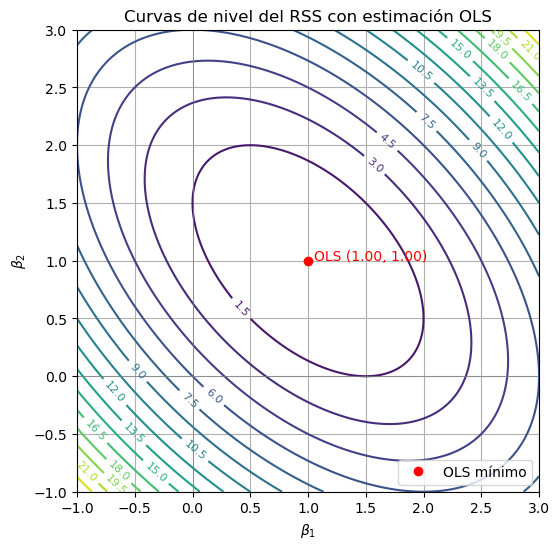

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz X y vector y
XX = np.array([[1, 0],
              [0, 1],
              [1, 1]])
yy = np.array([1, 1, 2])

# Estimación OLS: (X'X)^(-1) X'y
XtX = XX.T @ XX
Xty = XX.T @ yy
beta_ols = np.linalg.inv(XtX) @ Xty
beta1_hat, beta2_hat = beta_ols

# Crear grilla para beta1 y beta2
beta1 = np.linspace(-1, 3, 400)
beta2 = np.linspace(-1, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Calcular el RSS para cada combinación
RSS = (1 - B1)**2 + (1 - B2)**2 + (2 - B1 - B2)**2

# Graficar
plt.figure(figsize=(6, 6))
contours = plt.contour(B1, B2, RSS, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

# Punto OLS
plt.plot(beta1_hat, beta2_hat, 'ro', label='OLS mínimo')
plt.text(beta1_hat + 0.05, beta2_hat, f"OLS ({beta1_hat:.2f}, {beta2_hat:.2f})", color='red')

plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("Curvas de nivel del RSS con estimación OLS")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()

### Un contexto más general

La regularización es un método que nos permite restringir el proceso de estimación, se usa para evitar un posible sobre ajuste del modelo (*overfitting*).

Una forma de hacer regularización es donde los coeficientes de variables en el modelo no sean muy grandes (regresión *ridge*). Otra forma es contraer los coeficientes, llegando a tener coeficientes iguales a cero (regresión *lasso*).

Como regla general, el segundo enfoque suele ser mejor que el primero. 

Los coeficientes regularizados se obtiene usando una función de penalidad $p(\boldsymbol{\alpha})$ para restringir el tamaño del vector de coeficientes $\boldsymbol{\alpha} = (\alpha_1,\cdots,\alpha_M)^T$ del predictor $f(\mathbf{x}) = \sum_{j = 1}^{M} \alpha_jC_j(\mathbf{x})$. Los coeficientes penalizados son obtenidos como solución al problema de minimización:


$$
\hat{\boldsymbol{\alpha}}_{\lambda}= \underset{\boldsymbol{\alpha}}{\mathrm{argmin}} = \left\{\sum_{i = 1}^{n}L(y_i,f(\mathbf{x}_i))+\lambda p(\boldsymbol{\alpha}) \right\},
$$
donde $L$ es una función de pérdida y $\lambda>0$ es un parámetro de regularización también conocido como *ratio de aprendizaje*.

Existen diferentes opciones para funciones de pérdida:

-   Exponencial:

$$
L(y,f(\mathbf{x})) = e^{-yf(\mathbf{x})}, y \in \{-1,+1\}.
$$

-   Logística:


$$
L(y,f_t(\mathbf{x})) = \text{log}\{1+ e^{-2yf_t(\mathbf{x})}\},y \in \{-1,+1\}.
$$

-   Error cuadrático:


$$
L(y,f_t(\mathbf{x})) = \frac{1}{2}(y-f_t(\mathbf{x}))^2, y \in \mathcal{R}.
$$


-   Error absoluto:


$$
L(y,f_t(\mathbf{x})) =  |y-f_t(\mathbf{x})|, y \in \mathcal{R}.
$$


-   Huber


$$
L(y,f_t(\mathbf{x})) = \begin{cases}
\frac{1}{2}(y-f_t(\mathbf{x}))^2, & \text{if } |y-f_t(\mathbf{x})|\leq\delta,\\
\delta(|y-f_t(\mathbf{x})|-\delta/2), & \text{en otro caso.}
\end{cases}
$$


<img src="images/L1_fig1.png" width="500" height="300">


Hay dos tipos de funciones de penalidad:

-   $L_2$: esta función de penalidad restringe la suma de cuadrados de los coeficientes,

$$
p_2(\boldsymbol{\alpha})=\sum_{j = 1}^{M} \alpha_j^2.
$$
Cuando $L$ combinado es una combinación convexa y usamos la pérdida de error cuadrático, el predictor de regresión penalizado óptimo es el estimador de regresión *ridge*.



-   $L_1$: Los coeficientes se restringen tal que su suma de valores absolutos,

$$
p_1(\boldsymbol{\alpha})=\sum_{j = 1}^{M} |\alpha_j|.
$$
sea menor que un valor dado. La evidencia empírica sugiere que la penalización $L_1$ (*lasso*) funciona mejor cuando hay un número pequeño o mediano de coeficientes verdaderos de tamaño moderado.


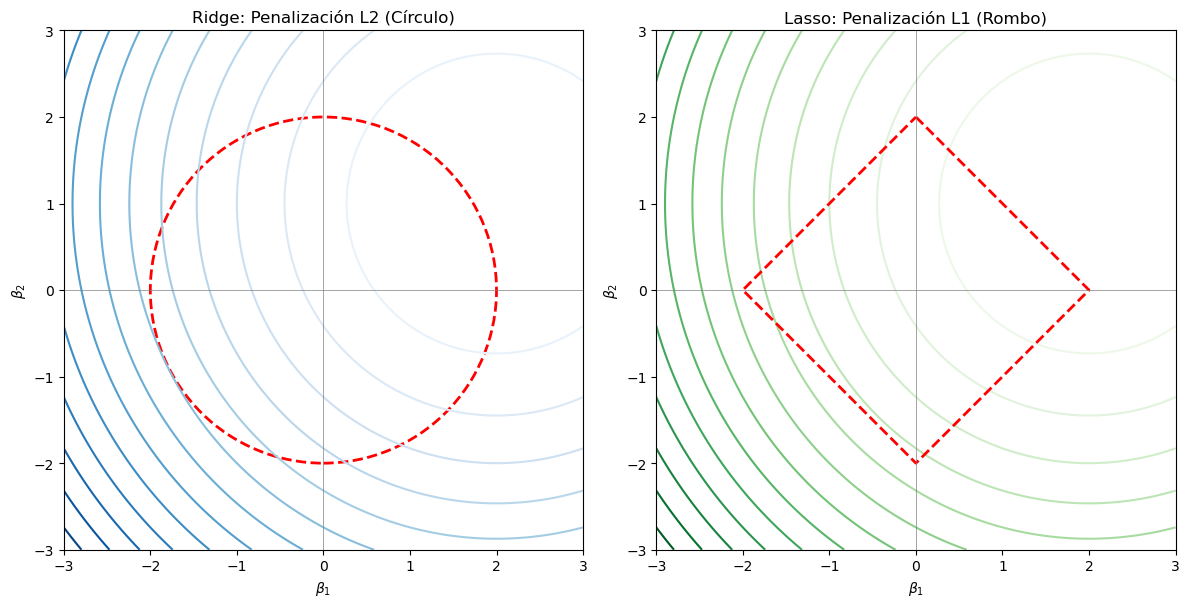

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una cuadrícula de valores para beta1 y beta2
beta1 = np.linspace(-3, 3, 400)
beta2 = np.linspace(-3, 3, 400)
B1, B2 = np.meshgrid(beta1, beta2)

# Simular una función de pérdida cuadrática (RSS) con mínimos en (2, 1)
RSS = (B1 - 2)**2 + (B2 - 1)**2

# Crear la figura
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# -------- Ridge (L2) --------
axs[0].contour(B1, B2, RSS, levels=15, cmap='Blues')
circle = plt.Circle((0, 0), 2, color='red', fill=False, linewidth=2, linestyle='--')
axs[0].add_artist(circle)
axs[0].set_title("Ridge: Penalización L2 (Círculo)")
axs[0].set_xlabel(r"$\beta_1$")
axs[0].set_ylabel(r"$\beta_2$")
axs[0].axhline(0, color='gray', linewidth=0.5)
axs[0].axvline(0, color='gray', linewidth=0.5)
axs[0].set_aspect('equal')
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-3, 3)

# -------- Lasso (L1) --------
axs[1].contour(B1, B2, RSS, levels=15, cmap='Greens')
# Dibujar el rombo para la norma L1 (|β1| + |β2| ≤ 2)
l1_boundary = np.array([
    [0, 2], [2, 0], [0, -2], [-2, 0], [0, 2]
])
axs[1].plot(l1_boundary[:, 0], l1_boundary[:, 1], color='red', linestyle='--', linewidth=2)
axs[1].set_title("Lasso: Penalización L1 (Rombo)")
axs[1].set_xlabel(r"$\beta_1$")
axs[1].set_ylabel(r"$\beta_2$")
axs[1].axhline(0, color='gray', linewidth=0.5)
axs[1].axvline(0, color='gray', linewidth=0.5)
axs[1].set_aspect('equal')
axs[1].set_xlim(-3, 3)
axs[1].set_ylim(-3, 3)

plt.tight_layout()
plt.show()


### Regresión *Ridge*

En mínimos cuadrados ordinarios, las estimaciones de $\beta_0,\beta_1,\ldots,\beta_p$ se obtienen minimizando

$$
\text{RSS} = \sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2.
$$

La **regresión *ridge*** es muy similar al enfoque de mínimos cuadrados, pero los coeficientes de la regresión *ridge* $\hat{\beta}^R$ son los valores que minimizan

$$
\sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2+\lambda\sum_{j = 1}^{p} \beta_j^2 = \text{RSS}+\lambda\sum_{j = 1}^{p} \beta_j^2,
$$

donde $\lambda$ es un parámetro ajustable que se determina de manera separada. La influencia de la regularización se controla con $\lambda$. Valores altos de  $\lambda$ significa más regularización y modelos más simples. Sin embargo, la regresión `ridge` siempre generará un modelo que incluya todos los predictores. Incrementar el valor de $\lambda$ tenderá a reducir las magnitudes de los coeficientes, pero no resultará en la exclusión de ninguna de las variables. Notemos que la penalidad no se aplica a $\beta_0$.

### Regresión *Lasso*


$$
\sum_{i = 1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij}\right)^2+\lambda\sum_{j = 1}^{p} |\beta_j| = \text{RSS}+\lambda\sum_{j = 1}^{p} |\beta_j|,
$$

La penalización $L_1$ tiene el efecto de forzar algunas de las estimaciones de coeficientes a ser **exactamente iguales a cero** cuando el parámetro $\lambda$ de ajuste es suficientemente grande. Por lo tanto, *lasso* realiza **selección de variables**. Como resultado, los modelos generados a partir de *lasso* son generalmente mucho más **fáciles de interpretar** que los producidos por regresión *ridge*. Decimos que *lasso* produce modelos dispersos (*sparse*), es decir, modelos que involucran solo un subconjunto de variables predictoras.

#### Ejemplo

Volvamos al ejemplo de la superintendencia de compañias del Ecuador

In [12]:
# Importación de bibliotecas necesarias
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------------
# DIVISIÓN DE LOS DATOS EN ENTRENAMIENTO Y PRUEBA
# -------------------------------------------------------------

# Divide el conjunto de datos en entrenamiento (80%) y prueba (20%)
# El parámetro random_state garantiza reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# -------------------------------------------------------------
# ESCALAMIENTO DE VARIABLES
# -------------------------------------------------------------

# Crea un objeto StandardScaler para estandarizar las variables (media 0, varianza 1)
scaler = StandardScaler()

# Ajusta y transforma los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transforma los datos de prueba con la misma escala (sin volver a ajustar)
X_test_scaled = scaler.transform(X_test)

# -------------------------------------------------------------
# CREACIÓN Y ENTRENAMIENTO DE MODELOS
# -------------------------------------------------------------

# Define el modelo Ridge con penalización L2 (alpha = 1.0)
ridge = Ridge(alpha=1.0)

# Define el modelo Lasso con penalización L1 (alpha = 5.0)
lasso = Lasso(alpha=5.0)

# Define la regresión lineal sin penalización (modelo base OLS)
regOLS = LinearRegression()

# Ajusta los modelos con los datos de entrenamiento escalados
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
regOLS.fit(X_train_scaled, y_train)

# -------------------------------------------------------------
# PREDICCIONES Y EVALUACIÓN EN TRAINING SET
# -------------------------------------------------------------

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred_ridge_tr = ridge.predict(X_train_scaled)
y_pred_lasso_tr = lasso.predict(X_train_scaled)
y_pred_ols_tr = regOLS.predict(X_train_scaled)

# Calcula el error cuadrático medio (MSE) sobre el set de entrenamiento
# num_factor se puede usar si se quiere normalizar el error (aquí vale 1)
num_factor = 1
mse_ridge_tr = mean_squared_error(y_train, y_pred_ridge_tr)/num_factor
mse_lasso_tr = mean_squared_error(y_train, y_pred_lasso_tr)/num_factor
mse_ols_tr = mean_squared_error(y_train, y_pred_ols_tr)/num_factor

# Imprime los resultados de entrenamiento
print("Evaluación del modelo en TRAIN:\n")
print(f"MSE Ridge: {mse_ridge_tr:.2f}")
print(f"MSE Lasso: {mse_lasso_tr:.2f}")
print(f"MSE OLS: {mse_ols_tr:.2f}")

# -------------------------------------------------------------
# PREDICCIONES Y EVALUACIÓN EN TEST SET
# -------------------------------------------------------------

# Realiza predicciones sobre el conjunto de prueba
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ols = regOLS.predict(X_test_scaled)

# Calcula el MSE sobre el set de prueba
mse_ridge = mean_squared_error(y_test, y_pred_ridge)/num_factor
mse_lasso = mean_squared_error(y_test, y_pred_lasso)/num_factor
mse_ols = mean_squared_error(y_test, y_pred_ols)/num_factor

# Imprime los resultados del test
print("\nEvaluación del modelo en TEST:\n")
print(f"MSE Ridge: {mse_ridge:.2f}")
print(f"MSE Lasso: {mse_lasso:.2f}")
print(f"MSE OLS: {mse_ols:.2f}")


Evaluación del modelo en TRAIN:

MSE Ridge: 1852.46
MSE Lasso: 2083.61
MSE OLS: 1852.46

Evaluación del modelo en TEST:

MSE Ridge: 3527.83
MSE Lasso: 3663.03
MSE OLS: 3527.39


In [13]:
# Mostrar coeficientes con nombres
ridge_coefficients = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coefficients'])
lasso_coefficients = pd.DataFrame(lasso.coef_, index=X.columns, columns=['Lasso Coefficients'])
ols_coefficients = pd.DataFrame(regOLS.coef_, index=X.columns, columns=['OLS Coefficients'])

# Combinar coeficientes en un solo DataFrame
coefficients = pd.concat([ridge_coefficients, lasso_coefficients,ols_coefficients], axis=1)
print("\nCoeficientes:")
print(coefficients)


Coeficientes:
                           Ridge Coefficients  Lasso Coefficients  \
activos                             46.452401           51.339290   
utilidad_an_imp                      7.140067            2.802706   
n_empleados                         20.230335           15.067053   
liquidez_corriente                   1.097188           -0.000000   
end_activo                          -0.310678            0.000000   
end_patrimonial                     -2.044002            0.000000   
end_activo_fijo                     -0.244253           -0.000000   
end_corto_plazo                      3.527861            0.000000   
cobertura_interes                    0.281633           -0.000000   
apalancamiento_financiero           -0.502044           -0.000000   
end_patrimonial_ct                   0.527377            0.000000   
end_patrimonial_nct                  1.076781            0.000000   
rot_cartera                          0.157103            0.000000   
rot_ventas         

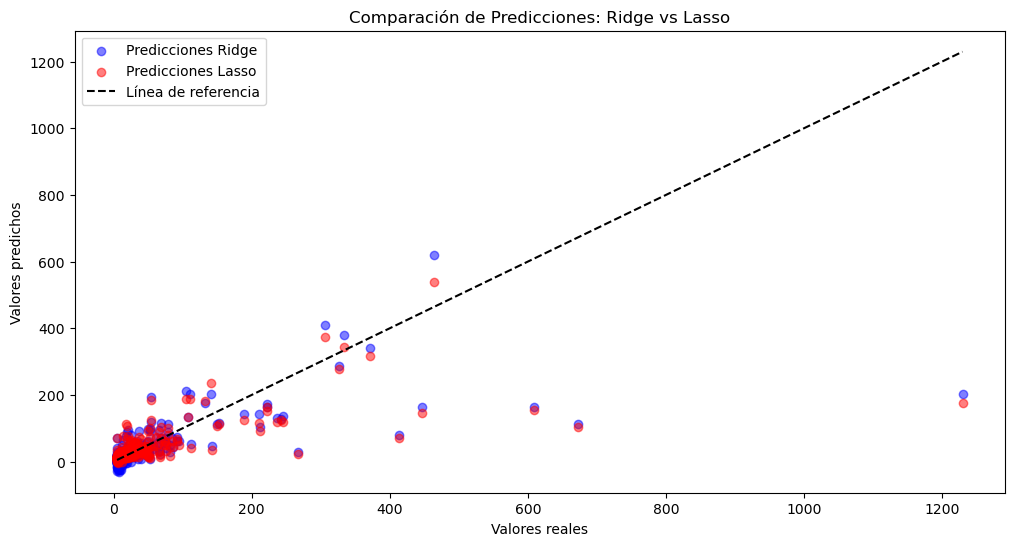

In [14]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label="Predicciones Ridge", alpha=0.5)
plt.scatter(y_test, y_pred_lasso, color='red', label="Predicciones Lasso", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label="Línea de referencia")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación de Predicciones: Ridge vs Lasso")
plt.legend()
plt.show()

Ajuste con el mejor $\lambda$

In [15]:
# Importación de herramientas para validación cruzada y búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# -------------------------------------------------------------
# DEFINICIÓN DEL RANGO DE ALPHA (λ) A PROBAR
# -------------------------------------------------------------

# Define una grilla de valores posibles para el hiperparámetro alpha (lambda)
# Alpha controla la intensidad de la penalización (regularización)
param_grid = {'alpha': [0.1, 0.5, 0.9, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500]}

# -------------------------------------------------------------
# CREACIÓN DE LOS MODELOS BASE
# -------------------------------------------------------------

# Crea instancias de los modelos Ridge y Lasso (aún sin alpha especificado)
ridge = Ridge()
lasso = Lasso()

# -------------------------------------------------------------
# CONFIGURACIÓN DE LA VALIDACIÓN CRUZADA
# -------------------------------------------------------------

# Crea un objeto KFold con 5 particiones (folds), barajando los datos y fijando semilla para reproducibilidad
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------------------------------------
# BÚSQUEDA DE HIPERPARÁMETROS CON GRIDSEARCHCV
# -------------------------------------------------------------

# Aplica GridSearchCV al modelo Ridge:
# - Se evalúa cada valor de alpha usando validación cruzada con el criterio de error cuadrático medio negativo
#   (porque sklearn maximiza por defecto, y el MSE debe minimizarse)
ridge_search = GridSearchCV(
    ridge, param_grid, scoring='neg_mean_squared_error', cv=kfold
)
ridge_search.fit(X_train_scaled, y_train)  # Entrena sobre los datos de entrenamiento escalados

# Aplica el mismo procedimiento para el modelo Lasso
lasso_search = GridSearchCV(
    lasso, param_grid, scoring='neg_mean_squared_error', cv=kfold
)
lasso_search.fit(X_train_scaled, y_train)

# -------------------------------------------------------------
# RESULTADOS ÓPTIMOS DE RIDGE
# -------------------------------------------------------------

# Extrae el mejor valor de alpha para Ridge que minimiza el MSE
best_ridge_alpha = ridge_search.best_params_['alpha']

# Obtiene el mejor score (negativo), y lo multiplica por -1 para obtener el MSE real
best_ridge_mse = -ridge_search.best_score_ / num_factor

# -------------------------------------------------------------
# RESULTADOS ÓPTIMOS DE LASSO
# -------------------------------------------------------------

# Extrae el mejor valor de alpha para Lasso
best_lasso_alpha = lasso_search.best_params_['alpha']

# MSE asociado al mejor alpha encontrado para Lasso (también se vuelve positivo)
best_lasso_mse = -lasso_search.best_score_ / num_factor


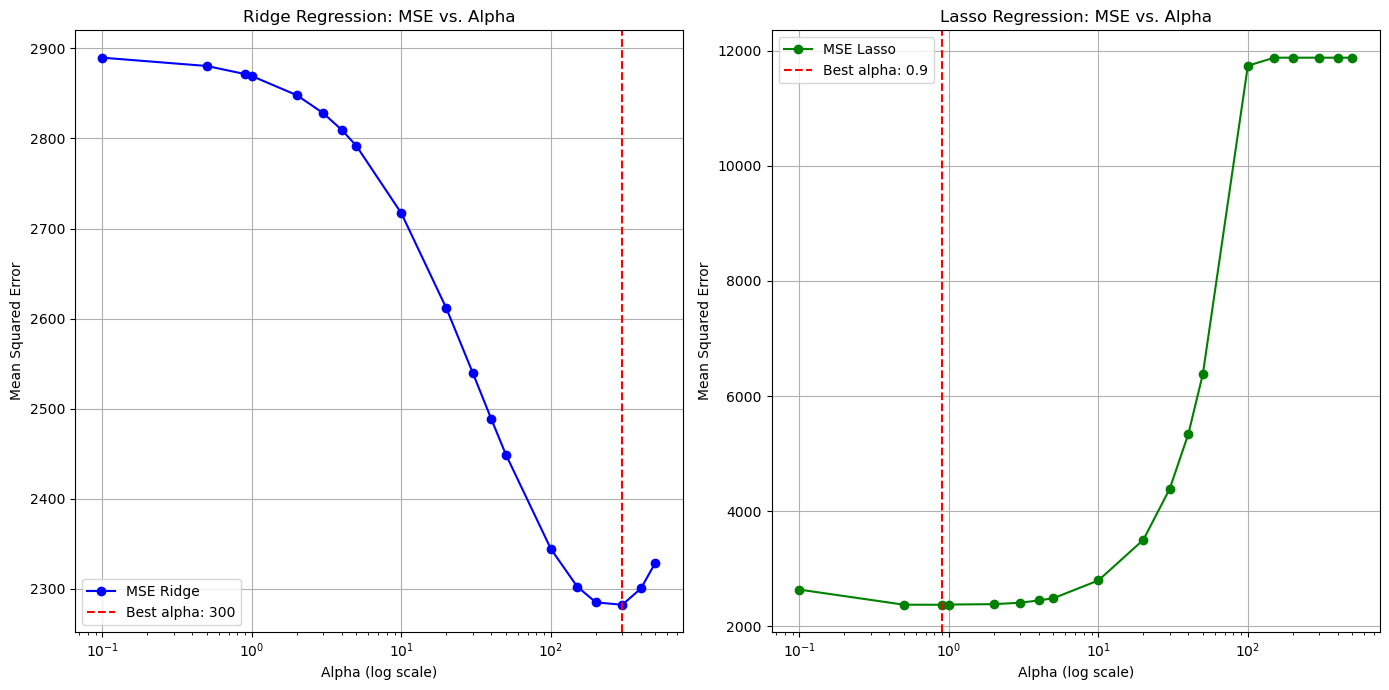

In [16]:
# Importación de bibliotecas para visualización y operaciones numéricas
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------
# EXTRACCIÓN DE RESULTADOS DEL GRIDSEARCH
# -------------------------------------------------------------

# Accede a los resultados de validación cruzada del GridSearch para Ridge
ridge_results = ridge_search.cv_results_

# Accede a los resultados de validación cruzada del GridSearch para Lasso
lasso_results = lasso_search.cv_results_

# Extrae los valores de alpha evaluados
alphas = ridge_results['param_alpha'].data  # Asegura que esté en formato iterable limpio

# -------------------------------------------------------------
# CÁLCULO DE MSE (recordando que estaban como negativos)
# -------------------------------------------------------------

# Convierte los scores negativos de Ridge a MSE positivos
ridge_mse = -ridge_results['mean_test_score']

# Convierte los scores negativos de Lasso a MSE positivos
lasso_mse = -lasso_results['mean_test_score']

# -------------------------------------------------------------
# VISUALIZACIÓN DE LOS RESULTADOS
# -------------------------------------------------------------

# Crea una figura de tamaño amplio
plt.figure(figsize=(14, 7))

# ----------- SUBPLOT PARA RIDGE -----------
plt.subplot(1, 2, 1)  # Primer gráfico (1 fila, 2 columnas, posición 1)
plt.plot(alphas, ridge_mse, marker='o', label='MSE Ridge', color='blue')  # Curva MSE vs alpha
plt.axvline(x=best_ridge_alpha, color='red', linestyle='--', label=f'Best alpha: {best_ridge_alpha}')  # Línea en el mejor alpha
plt.xscale('log')  # Usa escala logarítmica en el eje x
plt.title('Ridge Regression: MSE vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# ----------- SUBPLOT PARA LASSO -----------
plt.subplot(1, 2, 2)  # Segundo gráfico (1 fila, 2 columnas, posición 2)
plt.plot(alphas, lasso_mse, marker='o', label='MSE Lasso', color='green')  # Curva MSE vs alpha
plt.axvline(x=best_lasso_alpha, color='red', linestyle='--', label=f'Best alpha: {best_lasso_alpha}')  # Línea en el mejor alpha
plt.xscale('log')  # Escala logarítmica para visualizar bien los valores pequeños
plt.title('Lasso Regression: MSE vs. Alpha')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

# Ajusta automáticamente el diseño para que no se sobrepongan los elementos
plt.tight_layout()

# Muestra el gráfico final con ambos subplots
plt.show()


In [17]:
# -------------------------------------------------------------
# IMPRESIÓN DE LOS MEJORES RESULTADOS DE VALIDACIÓN CRUZADA
# -------------------------------------------------------------

# Imprime los mejores valores encontrados en la validación cruzada para ambos modelos
print("\nEvaluación del modelo en CV:\n")
print(f"Mejor alpha para Ridge: {best_ridge_alpha}")
print(f"Mejor MSE para Ridge: {best_ridge_mse:.2f} ")
print(f"Mejor alpha para Lasso: {best_lasso_alpha}")
print(f"Mejor MSE para Lasso: {best_lasso_mse:.2f} ")

# -------------------------------------------------------------
# AJUSTAR LOS MODELOS CON LOS MEJORES ALPHA
# -------------------------------------------------------------

# Crea nuevas instancias de Ridge y Lasso con los mejores valores de alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
lasso_best = Lasso(alpha=best_lasso_alpha)

# Ajusta ambos modelos con los datos de entrenamiento escalados
ridge_best.fit(X_train_scaled, y_train)
lasso_best.fit(X_train_scaled, y_train)

# -------------------------------------------------------------
# PREDICCIONES Y MSE EN TRAINING SET
# -------------------------------------------------------------

# Realiza predicciones sobre el conjunto de entrenamiento usando los modelos ajustados con el mejor alpha
y_pred_ridge_best_tr = ridge_best.predict(X_train_scaled)
y_pred_lasso_best_tr = lasso_best.predict(X_train_scaled)

# Calcula el MSE en el conjunto de entrenamiento
mse_ridge_best_tr = mean_squared_error(y_train, y_pred_ridge_best_tr) / num_factor
mse_lasso_best_tr = mean_squared_error(y_train, y_pred_lasso_best_tr) / num_factor

# Imprime los MSE obtenidos en entrenamiento
print("\nEvaluación del modelo en TRAIN:\n")
print(f"\nMSE Ridge con mejor alpha: {mse_ridge_best_tr:.2f}")
print(f"MSE Lasso con mejor alpha: {mse_lasso_best_tr:.2f} ")

# -------------------------------------------------------------
# PREDICCIONES Y MSE EN TEST SET
# -------------------------------------------------------------

# Realiza predicciones sobre el conjunto de prueba usando los modelos ajustados con el mejor alpha
y_pred_ridge_best = ridge_best.predict(X_test_scaled)
y_pred_lasso_best = lasso_best.predict(X_test_scaled)

# Calcula el MSE en el conjunto de prueba
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best) / num_factor
mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best) / num_factor

# Imprime los MSE obtenidos en prueba (test)
print("\nEvaluación del modelo en TEST:\n")
print(f"\nMSE Ridge con mejor alpha: {mse_ridge_best:.2f}")
print(f"MSE Lasso con mejor alpha: {mse_lasso_best:.2f} ")



Evaluación del modelo en CV:

Mejor alpha para Ridge: 300
Mejor MSE para Ridge: 2282.32 
Mejor alpha para Lasso: 0.9
Mejor MSE para Lasso: 2374.17 

Evaluación del modelo en TRAIN:


MSE Ridge con mejor alpha: 1903.47
MSE Lasso con mejor alpha: 1871.67 

Evaluación del modelo en TEST:


MSE Ridge con mejor alpha: 3617.36
MSE Lasso con mejor alpha: 3534.08 
